In [ ]:
#Instalacion de librerias
!pip3 install xlrd
!pip3 install openpyxl
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc, roc_auc_score, classification_report, roc_curve, precision_recall_curve, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
import plotly.express as px
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
import pickle
import os
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import mode


In [ ]:
df = pd.read_csv("../train.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Análisis exploratorio
¿Cuántas observaciones hay en la tabla? ¿Tenemos datos faltantes?
¿Cómo se distribuye la variable target?
¿Existen variables redundantes?
¿Qué variables están más correlacionadas con el target?
¿Cómo podemos visualizar las relaciones entre cada par de variables?Realizamos Analisis exploratorios:
    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

 Nuestra variable target esta desbalanceada

In [ ]:
round(df.Attrition.value_counts(normalize=True)*100)

0    83.0
1    17.0
Name: Attrition, dtype: float64

Vemos cuantos valores unicos hay por columna para ver si podemos identificar variables que cuenten con un unico valor

In [ ]:
{column: len(df[column].unique()) for column in df.columns}

{'Age': 43,
 'Attrition': 2,
 'BusinessTravel': 3,
 'DailyRate': 731,
 'Department': 3,
 'DistanceFromHome': 29,
 'Education': 5,
 'EducationField': 6,
 'EmployeeCount': 1,
 'EmployeeNumber': 1058,
 'EnvironmentSatisfaction': 4,
 'Gender': 2,
 'HourlyRate': 71,
 'JobInvolvement': 4,
 'JobLevel': 5,
 'JobRole': 9,
 'JobSatisfaction': 4,
 'MaritalStatus': 3,
 'MonthlyIncome': 991,
 'MonthlyRate': 1038,
 'NumCompaniesWorked': 10,
 'Over18': 1,
 'OverTime': 2,
 'PercentSalaryHike': 15,
 'PerformanceRating': 2,
 'RelationshipSatisfaction': 4,
 'StandardHours': 1,
 'StockOptionLevel': 4,
 'TotalWorkingYears': 40,
 'TrainingTimesLastYear': 7,
 'WorkLifeBalance': 4,
 'YearsAtCompany': 35,
 'YearsInCurrentRole': 19,
 'YearsSinceLastPromotion': 16,
 'YearsWithCurrManager': 18}

Revisamos que valores tienen las columnas que tienen un unico valor, decidimos eliminarlas pues no aportan informacion relevante

In [ ]:
for i in df.columns[df.columns.isin(["StandardHours", 'Over18','EmployeeCount'])]:
    a = df[i].value_counts(normalize=True)*100
    print(i)
    print(a)
    print("---------")

EmployeeCount
1    100.0
Name: EmployeeCount, dtype: float64
---------
Over18
Y    100.0
Name: Over18, dtype: float64
---------
StandardHours
80    100.0
Name: StandardHours, dtype: float64
---------


In [ ]:
#EmployeeNumber no muesta tampoco informacion relevante
len(df["EmployeeNumber"].unique())

1058

In [ ]:
df = df.drop(columns=["StandardHours", 'Over18','EmployeeCount',"EmployeeNumber"], axis = 1)
df.shape

(1058, 31)

#### Vamos a explorar los datos por medio de visualizaciones

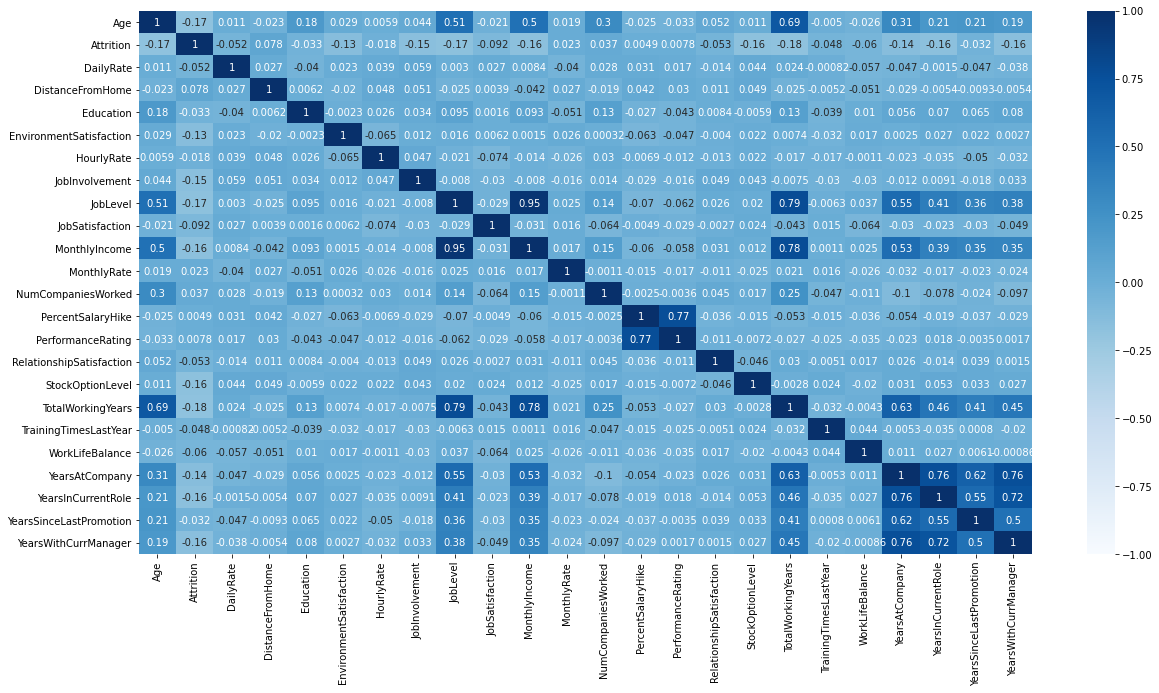

In [ ]:
#¿Qué variables están más correlacionadas con el target? 
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, cmap='Blues');

<AxesSubplot:>

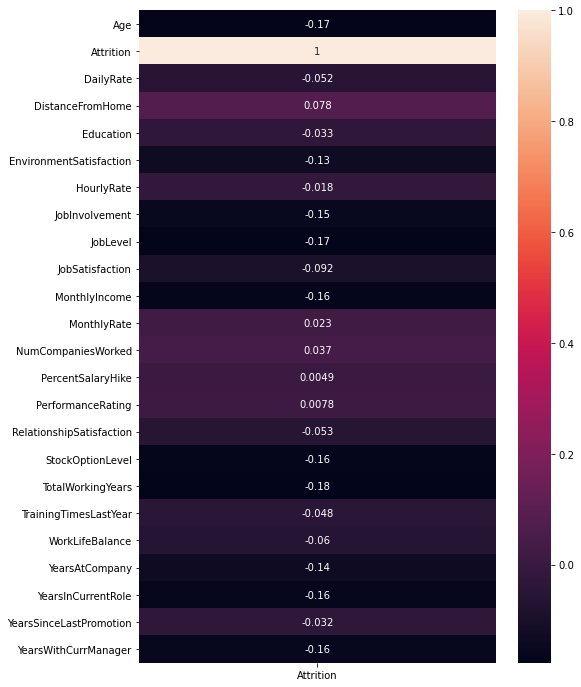

In [ ]:
# como las variables están correlacionadas con el target
plt.figure(figsize=(8,12))
sns.heatmap(df.corr()[['Attrition']], annot=True)

El Heatmap muestra que si la persona tiene mas años en la empresa, mas años con el mismo manager, mayor salario, mayor edad, mas satisfaccion con el trabajo, tiene menos propabilidades de cambiar de trabajo e irse de IBM.

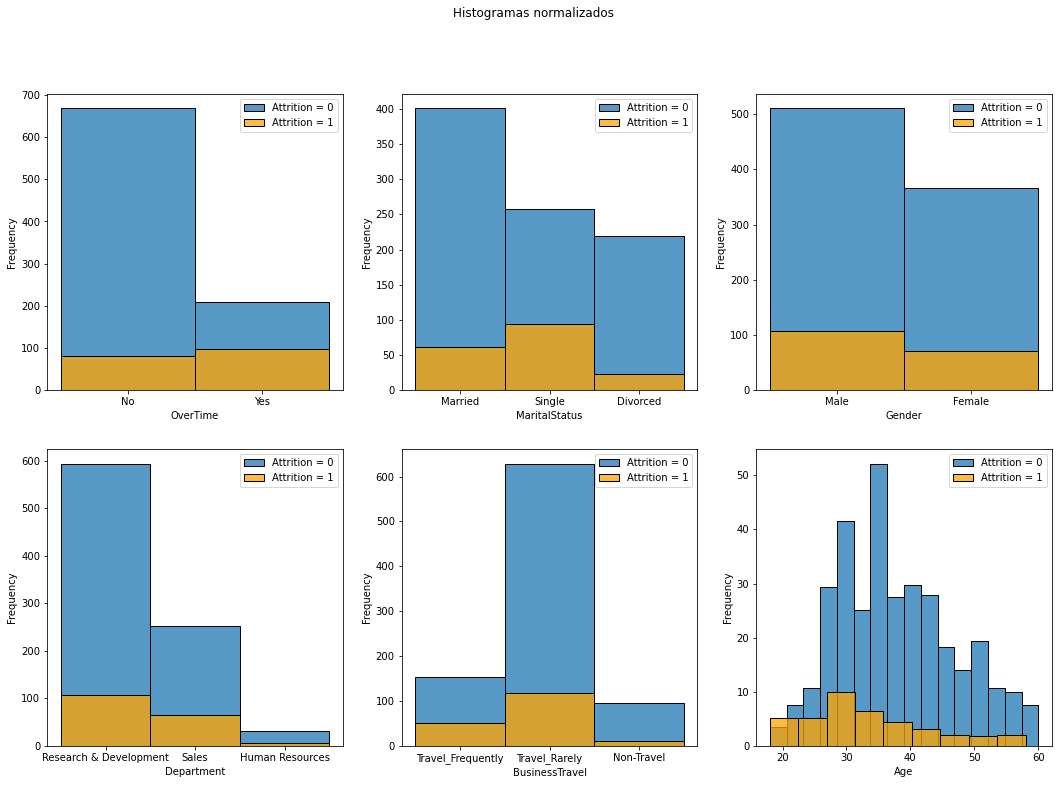

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,12))
fig.suptitle('Histogramas normalizados')
for c, ax in zip(df[["OverTime", "MaritalStatus", "Gender",  "Department", "BusinessTravel", "Age"]], axes.flatten()):
    sns.histplot(data = df.loc[df['Attrition']==0, c].dropna(), stat = 'frequency', ax = ax, kde = False )
    sns.histplot(data = df.loc[df['Attrition']==1, c].dropna(), stat = 'frequency', kde=False, ax=ax, color = 'orange')
    ax.legend(['Attrition = 0', 'Attrition = 1'])

En los graficos se confirma lo que vimos en el heatmap, que las personas mas jovenes son quienes mas se van. También se evidencia que quienes son solteros han renunciado en mayor cantidad en comparación a los demás estados civiles y que el area que mas movilidad de personal presenta es la de Investigación y Desarrollo.

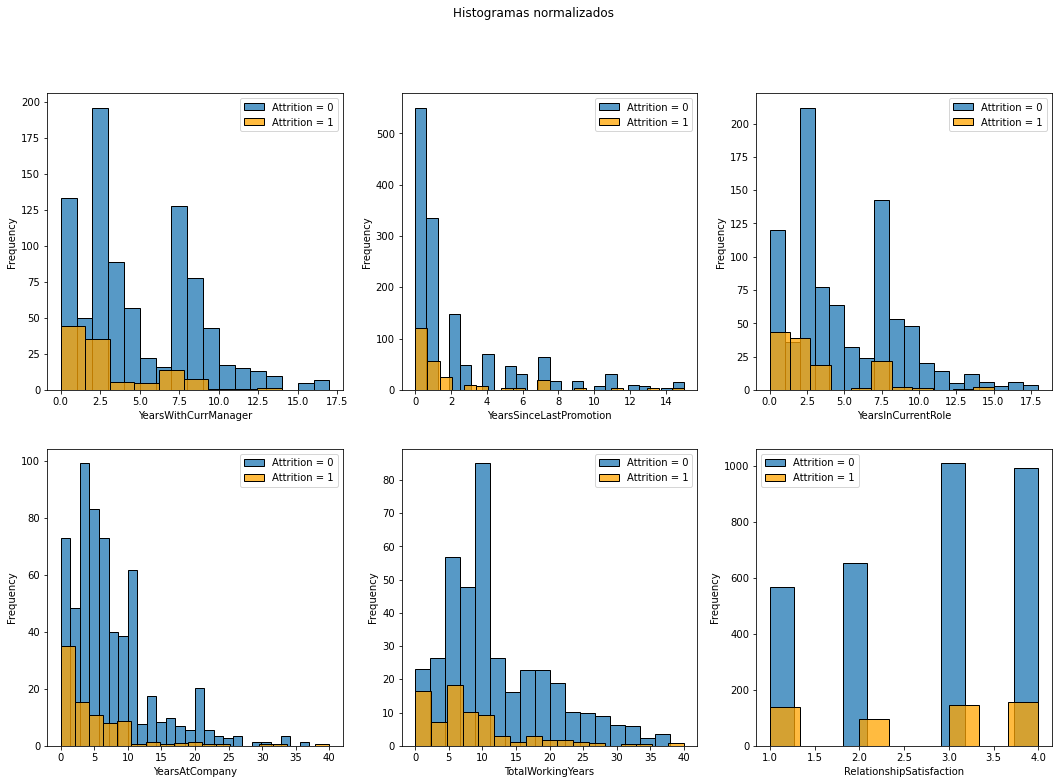

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,12))
fig.suptitle('Histogramas normalizados')
for c, ax in zip(df[["YearsWithCurrManager", "YearsSinceLastPromotion", "YearsInCurrentRole", "YearsAtCompany", "TotalWorkingYears", "RelationshipSatisfaction", "PerformanceRating"]], axes.flatten()):
    sns.histplot(data = df.loc[df['Attrition']==0, c].dropna(), stat = 'frequency', ax = ax, kde = False )
    sns.histplot(data = df.loc[df['Attrition']==1, c].dropna(), stat = 'frequency', kde=False, ax=ax, color = 'orange')
    ax.legend(['Attrition = 0', 'Attrition = 1'])

Estos gráficos siguen teniendo concordancia con los anteriores, porque implica que los trabajadores con menos antiguedad (en otras palabras, los mas jovenes) son los que tienen mayor posibilidad de abandonar el negocio.

In [ ]:
px.box(data_frame= df, y = "JobLevel",  color= "Attrition")

Se sigue mostrando relación con la descripción anterior, ya que los puestos de trabajo con mayor rotación son aquellos donde el nivel de jerarquía es menor.

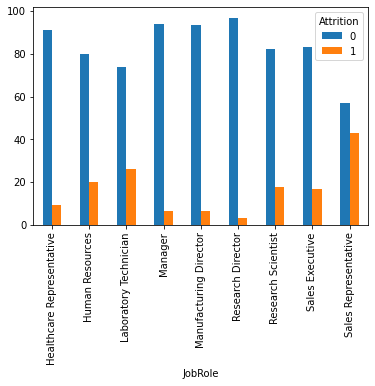

In [ ]:
# Gráfico de barras de Attrition segun JobRole
plot = pd.crosstab(index=df['JobRole'],
            columns=df['Attrition']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

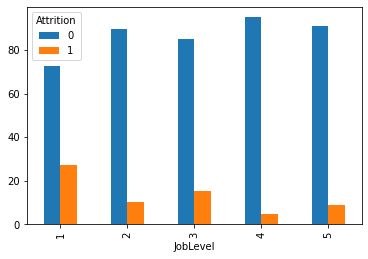

In [ ]:
# Gráfico de barras de Attrition segun JobRole
plot = pd.crosstab(index=df['JobLevel'],
            columns=df['Attrition']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

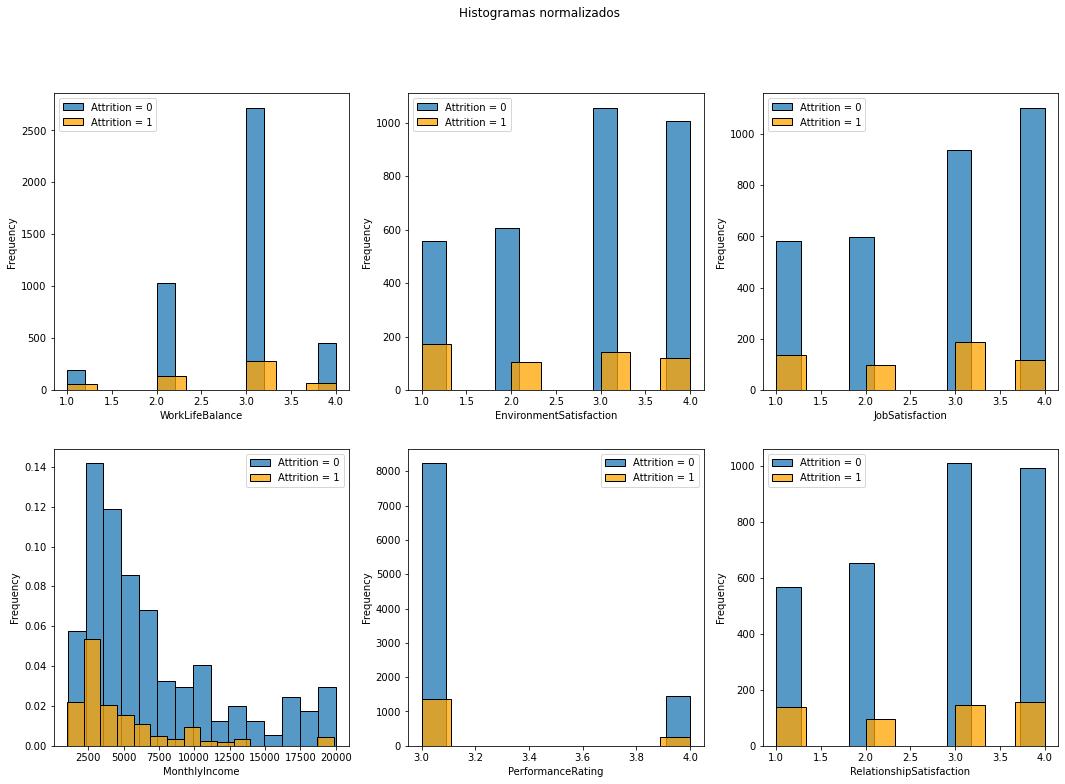

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,12))
fig.suptitle('Histogramas normalizados')
for c, ax in zip(df[["WorkLifeBalance", "EnvironmentSatisfaction", "JobSatisfaction",  "MonthlyIncome", "PerformanceRating", "RelationshipSatisfaction"]], axes.flatten()):
    sns.histplot(data = df.loc[df['Attrition']==0, c].dropna(), stat = 'frequency', ax = ax, kde = False )
    sns.histplot(data = df.loc[df['Attrition']==1, c].dropna(), stat = 'frequency', kde=False, ax=ax, color = 'orange')
    ax.legend(['Attrition = 0', 'Attrition = 1'])

Se puede inferir a la vez, a partir de estos gráficos, que los empleados más disconformes con su puesto de trabajo, serán los más propensos a abandonar el negocio. También aquellos con un bajo sueldo mensual y peor desempeño tienen menos probabilidades de continuar. 

Conclusión preliminar: En síntesis, hay una mayor probablidad a que la persona renuncie si: pertenece a un rango etario de temprana edad, sea soltero, se encuentre en el área de Desarrollo e Investigacion, haya ingresado en un periodo menor a los 5 años, se encuentren en una posicion poco jerarquica, esté disconforme, tenga un mal desempeño y cobre un un sueldo bajo.

In [ ]:
cat = df.loc[: ,df.dtypes == "object"]
df_dummies =  pd.get_dummies(data= df, columns=cat.columns, drop_first= True)
df_dummies

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,57,0,405,1,2,2,93,4,2,3,...,0,0,0,0,1,0,0,1,0,0
1054,49,0,1490,7,4,3,35,3,3,2,...,0,0,0,0,0,0,0,0,0,0
1055,34,0,829,15,3,2,71,3,4,1,...,0,0,0,1,0,0,0,0,0,0
1056,28,1,1496,1,3,1,92,3,1,3,...,0,0,0,0,0,0,1,1,0,0


**Train Test Split**

In [ ]:
X = df_dummies.drop(columns= "Attrition", axis= 1)
y = df_dummies["Attrition"]

In [ ]:
# Se combina over y under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
#primero aplicamos el over sampler
X_over, y_over = over.fit_resample(X, y)
# combinamos el resultado con under sampler
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)


In [ ]:
y_combined_sampling.value_counts()

0    548
1    439
Name: Attrition, dtype: int64

In [ ]:
print("Shape original:", X.shape)
print("Shape post modificaciones:" , X_combined_sampling.shape)

Shape original: (1058, 44)
Shape post modificaciones: (987, 44)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined_sampling, y_combined_sampling, random_state = 42)

In [ ]:
## ENSAMBLE DE MODELOS

In [ ]:
# Estandarizamos los datos

scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)

X_test_scl = scaler.transform(X_test)

In [ ]:
## Entrenamos el modelo de Regresion Logistica con regulacion - modelo 1


In [ ]:
# Entrenamos el modelo de regresión logística con regularización
model_1 = LogisticRegression(C = 0.8, class_weight = 'balanced', dual = False, fit_intercept = False, penalty= 'l1', solver= 'liblinear')
fit_1 = model_1.fit(X_train_scl, y_train);

In [ ]:
#Evaluamos la performance en test 
predict_1 = fit_1.predict_proba(X_test_scl)
predict_1_class_1 = predict_1[:, 1]
performance_1 = roc_auc_score(y_test, predict_1_class_1)
print('AUC Score1:')
print(performance_1)

predict_1_cat = fit_1.predict(X_test_scl)
accuracy_1 = accuracy_score(y_test, predict_1_cat)
print('Accuracy Score1:')
print(accuracy_1)
conf_mat_1 = confusion_matrix(y_test, predict_1_cat)
print('Matriz de confusion1:')
print(conf_mat_1)
recall_1 = recall_score(y_test, predict_1_cat)
print("Recall_1:")
print(recall_1)

AUC Score1:
0.881527193815272
Accuracy Score1:
0.8097165991902834
Matriz de confusion1:
[[120  26]
 [ 21  80]]
Recall_1:
0.7920792079207921


In [ ]:
## Entrenamos el modelo de Naive Bayes - modelo 2

In [ ]:
#Entrenamos el modelo de Naive Bayes
model_2 = GaussianNB()
fit_2 = model_2.fit(X_train_scl, y_train)

In [ ]:
#Evaluamos la performance en test 
predict_2 = fit_2.predict_proba(X_test_scl)
predict_2_class_1 = predict_2[:, 1]
performance_2 = roc_auc_score(y_test, predict_2_class_1)
print('AUC Score2:')
print(performance_2)

predict_2_cat = fit_2.predict(X_test_scl)
accuracy_2 = accuracy_score(y_test, predict_2_cat)
print('Accuracy Score2:')
print(accuracy_2)
conf_mat_2 = confusion_matrix(y_test, predict_2_cat)
print('Matriz de confusion2:')
print(conf_mat_2)
recall_2 = recall_score(y_test, predict_2_cat)
print("Recall_2:")
print(recall_2)

AUC Score2:
0.7663095076630952
Accuracy Score2:
0.6437246963562753
Matriz de confusion2:
[[79 67]
 [21 80]]
Recall_2:
0.7920792079207921


In [ ]:
## Entrenamos el modelo de arbol de desicion - modelo 3


In [ ]:
#Entrenamos el árbol de clasificación
model_3 = DecisionTreeClassifier(criterion='gini')
fit_3 = model_3.fit(X_train_scl, y_train)

In [ ]:
#Evaluamos la performance en test 
predict_3 = fit_3.predict_proba(X_test_scl)
predict_3_class_1 = predict_3[:, 1]
performance_3 = roc_auc_score(y_test, predict_3_class_1)
print('AUC Score3:')
print(performance_3)

predict_3_cat = fit_3.predict(X_test_scl)
accuracy_3 = accuracy_score(y_test, predict_3_cat)
print('Accuracy Score3:')
print(accuracy_3)
conf_mat_3 = confusion_matrix(y_test, predict_3_cat)
print('Matriz de confusion3:')
print(conf_mat_3)
recall_3 = recall_score(y_test, predict_3_cat)
print("Recall_3:")
print(recall_3)

AUC Score3:
0.8412789909127899
Accuracy Score3:
0.8340080971659919
Matriz de confusion3:
[[117  29]
 [ 12  89]]
Recall_3:
0.8811881188118812


In [ ]:
## Entrenamos el modelo  KNN - modelo 4

In [ ]:
model_4 = KNeighborsClassifier()
fit_4 = model_4.fit(X_train_scl, y_train)

In [ ]:
#Evaluamos la performance en test 
predict_4 = fit_4.predict_proba(X_test_scl)
predict_4_class_1 = predict_4[:, 1]
performance_4 = roc_auc_score(y_test, predict_4_class_1)
print('AUC Score4:')
print(performance_4)

predict_4_cat = fit_4.predict(X_test_scl)
accuracy_4 = accuracy_score(y_test, predict_4_cat)
print('Accuracy Score4:')
print(accuracy_4)
conf_mat_4 = confusion_matrix(y_test, predict_4_cat)
print('Matriz de confusion4:')
print(conf_mat_4)
recall_4 = recall_score(y_test, predict_4_cat)
print("Recall_4:")
print(recall_4)

AUC Score4:
0.7968262579682626
Accuracy Score4:
0.7327935222672065
Matriz de confusion4:
[[111  35]
 [ 31  70]]
Recall_4:
0.693069306930693


In [ ]:
## Construimos un modelo de ensamble usando 4 modelos base 

In [ ]:
 def predict_ensamble(X, model_1, model_2, model_3, model_4):
    y_pred_1 = model_1.predict(X)
    y_pred_2 = model_2.predict(X)
    y_pred_3 = model_3.predict(X)
    y_pred_4 = model_4.predict(X)
    result_mode = mode([y_pred_1, y_pred_2, y_pred_3, y_pred_4]).mode
    result = np.transpose(result_mode)    
    return result

In [ ]:
#Evaluamos la performance en test 
y_pred_ensemble = predict_ensamble(X_test, model_1, model_2, model_3, model_4)
performance_ensemble =  roc_auc_score(y_test, y_pred_ensemble)
print('AUC Ensamble:')
print(performance_ensemble)

predict_cat_ensemble = predict_ensamble(X_test, fit_1, fit_2, fit_3, fit_4)
accuracy_ensemble = accuracy_score(y_test, predict_cat_ensemble)
print('Accuracy Ensamble:')
print(accuracy_ensemble)
predict_cat_ensemble.shape
conf_mat_ensemble = confusion_matrix(y_test, predict_cat_ensemble)
print('Matriz Ensamble:')
print(conf_mat_ensemble)
recall_ensamble = recall_score(y_test, predict_cat_ensemble)
print("Recall:")
print(recall_ensamble)

AUC Ensamble:
0.5166485826664858
Accuracy Ensamble:
0.47368421052631576
Matriz Ensamble:
[[ 41 105]
 [ 25  76]]
Recall:
0.7524752475247525


In [ ]:
## Construimos un modelo de ensamble usando los modelos base  1 y 3

In [ ]:
def predict_ensamble(X, model_1, model_3):
    y_pred_1 = model_1.predict(X)
    y_pred_3 = model_3.predict(X)
    result_mode_1y3 = mode([y_pred_1, y_pred_3]).mode
    result = np.transpose(result_mode_1y3)    
    return result

In [ ]:
#Evaluamos la performance en test 
y_pred_ensemble_1y3 = predict_ensamble(X_test, model_1, model_3)
performance_ensemble_1y3 =  roc_auc_score(y_test, y_pred_ensemble_1y3)
print('AUC Ensamble 1y3:')
print(performance_ensemble_1y3)

predict_cat_ensemble_1y3 = predict_ensamble(X_test, fit_1, fit_3)
accuracy_ensemble_1y3 = accuracy_score(y_test, predict_cat_ensemble_1y3)
print('Accuracy Ensamble 1y3:')
print(accuracy_ensemble_1y3)
predict_cat_ensemble_1y3.shape
conf_mat_ensemble_1y3 = confusion_matrix(y_test, predict_cat_ensemble_1y3)
print('Matriz Ensamble 1y3:')
print(conf_mat_ensemble_1y3)
recall_ensamble_1y3 = recall_score(y_test, predict_cat_ensemble_1y3)
print("Recall 1y3:")
print(recall_ensamble_1y3)

AUC Ensamble 1y3:
0.4861657398616574
Accuracy Ensamble 1y3:
0.4574898785425101
Matriz Ensamble 1y3:
[[48 98]
 [36 65]]
Recall 1y3:
0.6435643564356436


In [ ]:
##RandomForest

In [ ]:
pasos = [('preprocesamiento', StandardScaler()), ('clasificador', RandomForestClassifier())]
pipe = Pipeline(pasos)

#Hacemos los folds para el GridSearchCV

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

#Se colocan los parametros del GridSearchCV (esto va en funcion del modelo)

param_grid = [{'preprocesamiento':[StandardScaler(), MinMaxScaler(), None],
               'clasificador__n_estimators':[50,100,150,200],'clasificador__criterion':["gini", "entropy"],
               "clasificador__max_depth" : range(2,10,1), "clasificador__max_features":['auto', 'sqrt', 'log2'],
               "clasificador__min_samples_leaf":range(1,10,1), "clasificador__class_weight" : ["balanced"]}]

In [ ]:

grid = GridSearchCV(pipe, param_grid, cv=folds, n_jobs= -1)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocesamiento', StandardScaler()),
                                       ('clasificador',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'clasificador__class_weight': ['balanced'],
                          'clasificador__criterion': ['gini', 'entropy'],
                          'clasificador__max_depth': range(2, 10),
                          'clasificador__max_features': ['auto', 'sqrt',
                                                         'log2'],
                          'clasificador__min_samples_leaf': range(1, 10),
                          'clasificador__n_estimators': [50, 100, 150, 200],
                          'preprocesamiento': [StandardScaler(), MinMaxScaler(),
                                               None]}])

In [ ]:
#Best Score y Estimator
print('Score: ',grid.best_score_)
grid.best_estimator_


Score:  0.8945945945945946


Pipeline(steps=[('preprocesamiento', StandardScaler()),
                ('clasificador',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=9,
                                        max_features='log2',
                                        n_estimators=50))])

In [ ]:
#Prediccion del Estimator

y_pred = grid.best_estimator_.predict(X_test)
pred_probas = grid.best_estimator_.predict_proba(X_test);

#DUDAS, no creo que tenga que ponerlo
grid.score(X_test,y_test)

0.8825910931174089

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       146
           1       0.88      0.82      0.85       101

    accuracy                           0.88       247
   macro avg       0.88      0.87      0.88       247
weighted avg       0.88      0.88      0.88       247

Area bajo la curva ROC: 0.924521904245219
Area bajo la curva Precision-Recall: 0.9276377643959136


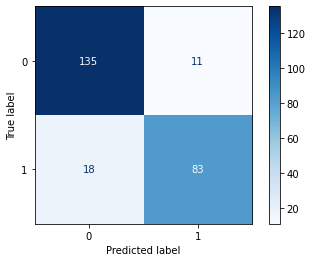

In [ ]:
print(classification_report(y_test,y_pred))
plot_confusion_matrix(grid,X_test,y_test,cmap='Blues');

print('Area bajo la curva ROC:',roc_auc_score(y_test,pred_probas[:,1]))

precision, recall,threshold=precision_recall_curve(y_test,pred_probas[:,1]);

print('Area bajo la curva Precision-Recall:',auc(recall,precision))

**Para ver la importancia de las variables**

In [ ]:
ms = MinMaxScaler()
X_train =   pd.DataFrame(ms.fit_transform(X_train), columns = X_train.columns)   
X_test = pd.DataFrame(ms.transform(X_test), columns = X_test.columns)  


In [ ]:
modelo_RF = RandomForestClassifier(class_weight='balanced', max_depth=9,
                                        n_estimators=50, random_state= 42)

modelo_RF.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=50,
                       random_state=42)

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': modelo_RF.feature_importances_
}).sort_values('importance', ascending=False)

print(importance_df.head())

           feature  importance
9    MonthlyIncome    0.075582
19  YearsAtCompany    0.069202
0              Age    0.059528
10     MonthlyRate    0.058020
1        DailyRate    0.046271


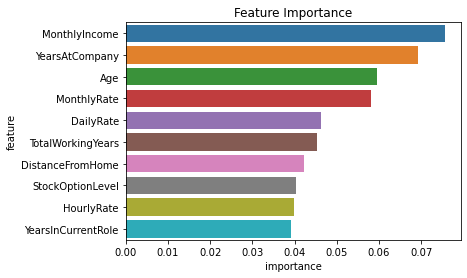

In [ ]:

plt.title('Feature Importance')

sns.barplot(data = importance_df.head(10), x='importance', y='feature');

In [ ]:
## XGBOST con pipeline


In [ ]:
##### Balanceo y train-test-split

In [ ]:
##### Comienzo el pipeline

In [ ]:
!pip3 install xgboost


In [ ]:

from xgboost.sklearn import XGBClassifier


pasos = [('preprocesamiento', StandardScaler()), ('clasificador', XGBClassifier())]

pipe = Pipeline(pasos)

In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

In [ ]:

param_grid = [{'preprocesamiento':[StandardScaler(), None],
               'clasificador__n_estimators':[50,100,500],'clasificador__max_depth':[1,2,3,4],'clasificador__learning_rate':[0.01, 0.1]}]


In [ ]:
#Entrenamos la instancia del pipe

xgb = GridSearchCV(pipe, param_grid=param_grid, cv=cv, verbose=1, n_jobs=5)

In [ ]:
xgb.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  55 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 231 out of 240 | elapsed:    9.1s remaining:    0.3s
[Parallel(n_jobs=5)]: Done 240 out of 240 | elapsed:    9.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=Pipeline(steps=[('preprocesamiento', StandardScaler()),
                                       ('clasificador',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      fea...
                                                     

In [ ]:
xgb.best_params_

{'clasificador__learning_rate': 0.1,
 'clasificador__max_depth': 4,
 'clasificador__n_estimators': 500,
 'preprocesamiento': StandardScaler()}

In [ ]:
def evaluar_rendimiento(modelo, nombre, X, y, cv):
    s = cross_val_score(modelo, X, y, cv=cv, n_jobs=2)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [ ]:
evaluar_rendimiento(xgb.best_estimator_,"XG Boost", X_combined_sampling, y_combined_sampling, cv)

Rendimiento de XG Boost:	0.903 ± 0.024


In [ ]:

xgb_auc = roc_auc_score(y_test, xgb.predict(X_test))
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.888851213888512


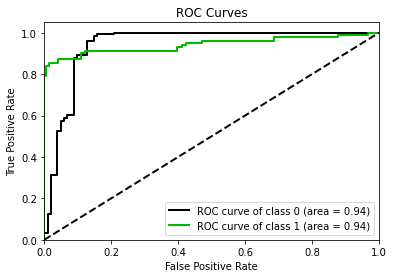

In [ ]:
from scikitplot.metrics import plot_roc
plot_roc(y_test, xgb.predict_proba(X_test), plot_micro = False, plot_macro= False);

In [ ]:
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       146
           1       0.83      0.90      0.87       101

    accuracy                           0.89       247
   macro avg       0.88      0.89      0.88       247
weighted avg       0.89      0.89      0.89       247



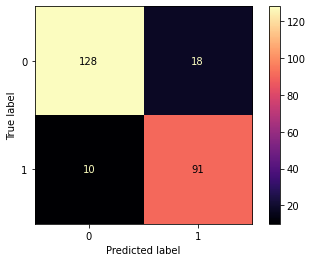

In [ ]:
plot_confusion_matrix(xgb,X_test,y_test,cmap='magma');

In [ ]:
##### Importancia Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_train =   pd.DataFrame(ms.fit_transform(X_train), columns = X_train.columns)   
X_test = pd.DataFrame(ms.transform(X_test), columns = X_test.columns)  

In [ ]:
xgb.best_params_

{'clasificador__learning_rate': 0.1,
 'clasificador__max_depth': 4,
 'clasificador__n_estimators': 500,
 'preprocesamiento': StandardScaler()}

In [ ]:
modelo = XGBClassifier(learning_rate= 0.1,max_depth= 3,n_estimators= 500)

In [ ]:
modelo.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': modelo.feature_importances_
}).sort_values('importance', ascending=False)

print(importance_df.head())

                           feature  importance
37       JobRole_Research Director    0.122473
7                         JobLevel    0.062401
19                  YearsAtCompany    0.050393
4          EnvironmentSatisfaction    0.038424
36  JobRole_Manufacturing Director    0.037397


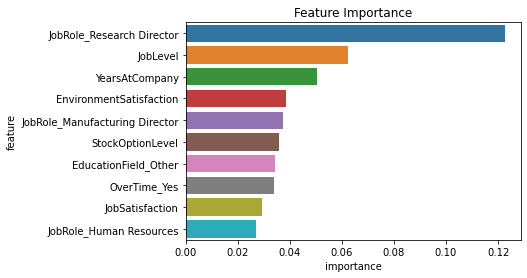

In [ ]:
plt.title('Feature Importance')

sns.barplot(data = importance_df.head(10), x='importance', y='feature');

**Guardamos el modelo con pickle**

In [ ]:
#Guardamos el modelo
with open('../Definitivo/modelo_rf.pkl', 'wb') as modelo_rf:
    pickle.dump(modelo_RF, modelo_rf)

In [ ]:
#Levantamos el modelo
with open('../Definitivo/modelo_rf.pkl', 'rb') as modelo_rf:
    modelo_ibm_rf = pickle.load(modelo_rf)

**Probamos el modelo con la base de test**

In [ ]:
df_test = pd.read_csv("../test.csv")

In [ ]:
df_test_ = df_test.drop(columns=["StandardHours", 'Over18','EmployeeCount',"EmployeeNumber"], axis = 1)
df_test_

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,34,Travel_Rarely,790,Sales,24,4,Medical,1,Female,40,...,4,3,0,16,2,4,15,9,10,10
1,35,Travel_Rarely,660,Sales,7,1,Life Sciences,4,Male,76,...,3,1,1,1,3,3,1,0,0,0
2,24,Travel_Frequently,381,Research & Development,9,3,Medical,2,Male,89,...,3,3,0,4,2,2,0,0,0,0
3,24,Non-Travel,830,Sales,13,2,Life Sciences,4,Female,78,...,3,3,1,1,2,3,1,0,0,0
4,44,Travel_Frequently,1193,Research & Development,2,1,Medical,2,Male,86,...,3,2,0,16,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,3,3,1,17,3,3,5,2,0,3
408,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,3,1,1,9,5,3,7,7,1,7
409,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,4,2,1,6,0,3,6,2,0,3
410,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
cat = df_test_.loc[: ,df_test_.dtypes == "object"]
df_dummies_test =  pd.get_dummies(data= df_test_, columns=cat.columns, drop_first= True)
df_dummies_test

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,34,790,24,4,1,40,2,2,2,4599,...,0,0,0,0,0,1,0,0,1,1
1,35,660,7,1,4,76,3,1,3,2404,...,0,0,0,0,0,0,1,1,0,0
2,24,381,9,3,2,89,3,1,1,3172,...,1,0,0,0,0,0,0,0,1,1
3,24,830,13,2,4,78,3,1,2,2033,...,0,0,0,0,0,0,1,1,0,0
4,44,1193,2,1,2,86,3,3,3,10209,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,36,884,23,2,3,41,4,2,4,2571,...,1,0,0,0,0,0,0,1,0,0
408,39,613,6,1,4,42,2,3,1,9991,...,0,0,0,0,0,0,0,1,0,0
409,27,155,4,3,2,87,4,2,2,6142,...,0,0,1,0,0,0,0,1,0,1
410,49,1023,2,3,4,63,2,2,2,5390,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
df_dummies_test_sc = scaler.fit_transform(df_dummies_test)

In [ ]:
y_test_pred = modelo_ibm_rf.predict(df_dummies_test_sc)

In [ ]:
Attrition = pd.DataFrame(y_test_pred, columns= ["Attrition"])

In [ ]:
Attrition.value_counts()

Attrition
1            254
0            158
dtype: int64

In [ ]:
df_test_final = pd.concat([df_test, Attrition], axis= 1)

In [ ]:
df_test_final

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,34,Travel_Rarely,790,Sales,24,4,Medical,1,1489,1,...,80,0,16,2,4,15,9,10,10,1
1,35,Travel_Rarely,660,Sales,7,1,Life Sciences,1,1492,4,...,80,1,1,3,3,1,0,0,0,1
2,24,Travel_Frequently,381,Research & Development,9,3,Medical,1,1494,2,...,80,0,4,2,2,0,0,0,0,1
3,24,Non-Travel,830,Sales,13,2,Life Sciences,1,1495,4,...,80,1,1,2,3,1,0,0,0,1
4,44,Travel_Frequently,1193,Research & Development,2,1,Medical,1,1496,2,...,80,0,16,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,80,1,17,3,3,5,2,0,3,1
408,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,80,1,9,5,3,7,7,1,7,0
409,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,80,1,6,0,3,6,2,0,3,1
410,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,80,0,17,3,2,9,6,0,8,0


**Analizamos las caracteristicas de las personas que abandonan la empresa**

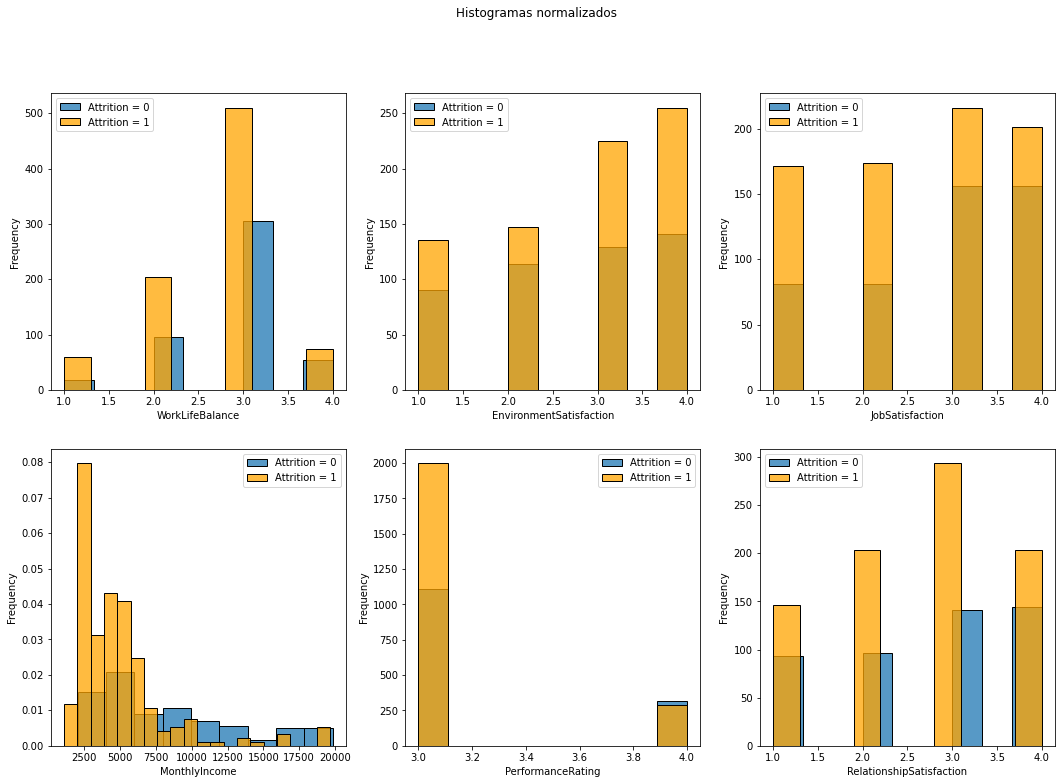

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,12))
fig.suptitle('Histogramas normalizados')
for c, ax in zip(df[["WorkLifeBalance", "EnvironmentSatisfaction", "JobSatisfaction",  "MonthlyIncome", "PerformanceRating", "RelationshipSatisfaction"]], axes.flatten()):
    sns.histplot(data = df_test_final.loc[df_test_final['Attrition']==0, c].dropna(), stat = 'frequency', ax = ax, kde = False )
    sns.histplot(data = df_test_final.loc[df_test_final['Attrition']==1, c].dropna(), stat = 'frequency', kde=False, ax=ax, color = 'orange')
    ax.legend(['Attrition = 0', 'Attrition = 1'])

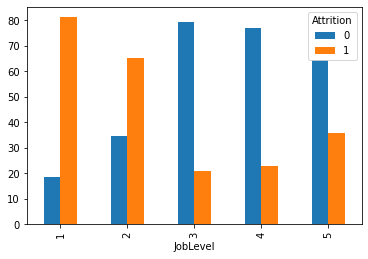

In [ ]:
plot = pd.crosstab(index=df_test_final['JobLevel'],
            columns=df_test_final['Attrition']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

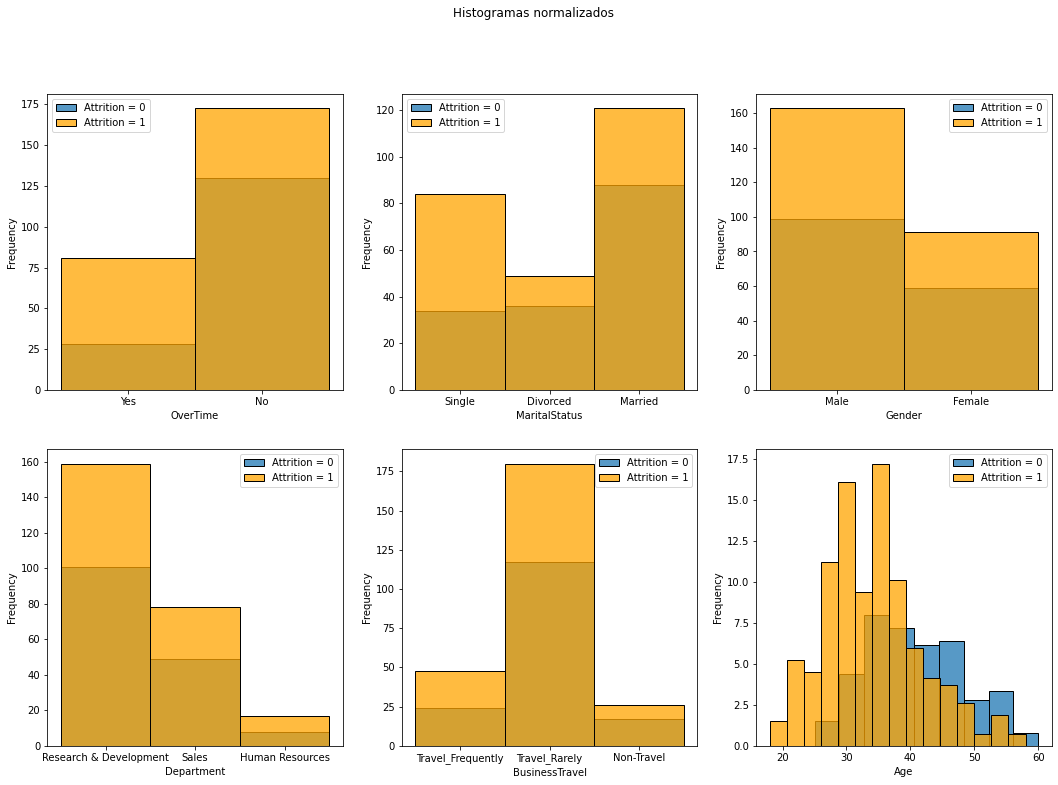

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,12))
fig.suptitle('Histogramas normalizados')
for c, ax in zip(df_test_final[["OverTime", "MaritalStatus", "Gender",  "Department", "BusinessTravel", "Age"]], axes.flatten()):
    sns.histplot(data = df_test_final.loc[df_test_final['Attrition']==0, c].dropna(), stat = 'frequency', ax = ax, kde = False )
    sns.histplot(data = df_test_final.loc[df_test_final['Attrition']==1, c].dropna(), stat = 'frequency', kde=False, ax=ax, color = 'orange')
    ax.legend(['Attrition = 0', 'Attrition = 1'])

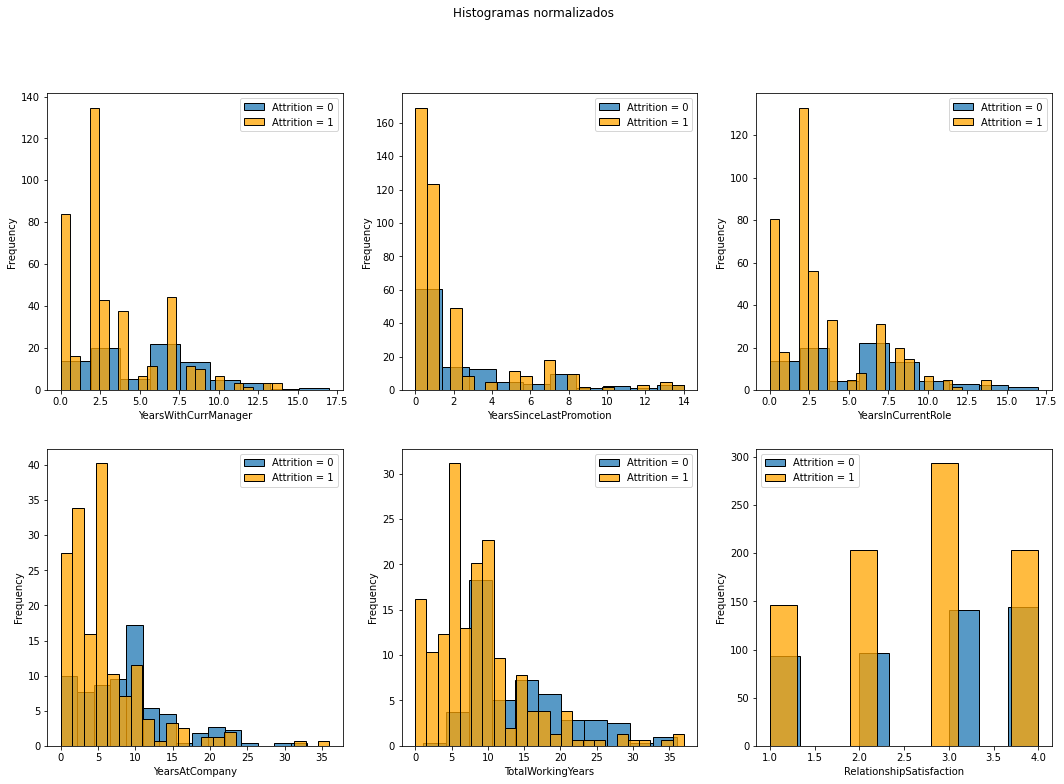

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,12))
fig.suptitle('Histogramas normalizados')
for c, ax in zip(df_test_final[["YearsWithCurrManager", "YearsSinceLastPromotion", "YearsInCurrentRole", "YearsAtCompany", "TotalWorkingYears", "RelationshipSatisfaction", "PerformanceRating"]], axes.flatten()):
    sns.histplot(data = df_test_final.loc[df_test_final['Attrition']==0, c].dropna(), stat = 'frequency', ax = ax, kde = False )
    sns.histplot(data = df_test_final.loc[df_test_final['Attrition']==1, c].dropna(), stat = 'frequency', kde=False, ax=ax, color = 'orange')
    ax.legend(['Attrition = 0', 'Attrition = 1'])